# Importation of libraries

In [1]:
from gensim.utils import tokenize
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import en_core_web_sm
from sklearn.linear_model import LogisticRegression
from tqdm.autonotebook import tqdm 
from gensim.models import word2vec
import marshal
from jyquickhelper import add_notebook_menu
add_notebook_menu()

/home/manie/Documents/ENTER/lib/python3.7/site-packages/ipykernel_launcher.py:8: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  


## Importation of data

In [2]:
doc = 2
file_dataset_name=["comm_use_subset_pdf_json","comm_use_subset_pmc_json","biorxiv_medrxiv_pdf_json","noncomm_use_subset_pdf_json","noncomm_use_subset_pmc_json","custom_license_pdf_json","custom_license_pmc_json"]

def user_folder(user,fin_chemin):
    if user=="MS":
        folder="/home/manie/Documents/Stage/stage_analyse_de_texte/Donnees"+"/"+fin_chemin
    elif user=="SP":
        folder="/Users/sergiopeignier/Desktop/COVID_2019/Donnees"+"/"+fin_chemin
    else:
        folder==""
        print("Veuillez indiquer votre dossier")
    return folder

def creation_folder(version,noms):
    fic="Donnees_traitees/abstract_clean/"+str(version)+"_"+str(noms)+".csv"
    folder = user_folder(user,fic)
    return folder

user="MS"
#user="SP"

folder_0 = creation_folder("abstract_v1",file_dataset_name[doc])
dataset = pd.read_csv(folder_0,index_col=0)
List_text = dataset.iloc[:,1]

In [3]:
dataset

section  \
Identifiant_unique                                             
d71e87ca58f191863eb830b026910c9f4eeaa290_1_abst...  abstract   
47a7579cf81744a0a83b1b64cc9017fb600452cd_1_abst...  abstract   
2757708c4f72260abefb9d74302d868165cbc1a4_1_abst...  abstract   
6d0bae20db2c120336ad5fea0440a90339b65c74_1_abst...  abstract   
ec5c4fc8dc496b32b85dfed9a17b50a6e61f32c8_1_abst...  abstract   
...                                                      ...   
3ebbcdddb122f405061bb5e1ddcf94abe9258d58_1_abst...  abstract   
620d69e419e3c8756de8bf96d86f6bf0de7ed919_1_abst...  abstract   
14ba08b307d929d39d4e4c7f137e86c74caff9ec_1_abst...  abstract   
60f9bdb06e4d0d721e3436eedbe6891594d2de46_1_abst...  abstract   
a4adb388a46eebcba31b35ae4b913b29d4920ab7_1_abst...  abstract   

                                                                                    body-section-text  \
Identifiant_unique                                                                                      
d71e87ca58f191863eb830b026910c9f4eeaa290_1_abst...  Organisation as a pandemic due to its worldwid...   
47a7579cf81744a0a83b1b64cc9017fb600452cd_1_abst...  We conducted a retrospective study among 417 c...   
2757708c4f72260abefb9d74302d868165cbc1a4_1_abst...  bioRxiv preprint 42 findings also provide an a...   
6d0bae20db2c120336ad5fea0440a90339b65c74_1_abst...  Many viral infections can be prevented by immu...   
ec5c4fc8dc496b32b85dfed9a17b50a6e61f32c8_1_abst...  We propose a Gauss model (GM), a map from time...   
...                                                                                               ...   
3ebbcdddb122f405061bb5e1ddcf94abe9258d58_1_abst...  In December 2019, the first cases of a novel c...   
620d69e419e3c8756de8bf96d86f6bf0de7ed919_1_abst...  Background: Viral encephalitis is a dangerous ...   
14ba08b307d929d39d4e4c7f137e86c74caff9ec_1_abst...  1 inflammatory storm incited by monocyte centr...   
60f9bdb06e4d0d721e3436eedbe6891594d2de46_1_abst...  There is big concern for estimating the lethal...   
a4adb388a46eebcba31b35ae4b913b29d4920ab7_1_abst...  Italy currently constitutes the epicenter of t...   

                                                                                                title  \
Identifiant_unique                                                                                      
d71e87ca58f191863eb830b026910c9f4eeaa290_1_abst...  the effectiveness of social distancing in miti...   
47a7579cf81744a0a83b1b64cc9017fb600452cd_1_abst...  epidemiological and clinical characteristics o...   
2757708c4f72260abefb9d74302d868165cbc1a4_1_abst...  recapitulation of infection and cholangiocyte ...   
6d0bae20db2c120336ad5fea0440a90339b65c74_1_abst...  using directed attenuation to enhance vaccine ...   
ec5c4fc8dc496b32b85dfed9a17b50a6e61f32c8_1_abst...  predictions using a gauss model based on data ...   
...                                                                                               ...   
3ebbcdddb122f405061bb5e1ddcf94abe9258d58_1_abst...  substrate specificity profiling of m pro prote...   
620d69e419e3c8756de8bf96d86f6bf0de7ed919_1_abst...  neuronal ccl2 expression drives inflammatory m...   
14ba08b307d929d39d4e4c7f137e86c74caff9ec_1_abst...  tocilizumab treatment in severe patients atten...   
60f9bdb06e4d0d721e3436eedbe6891594d2de46_1_abst...  how lethal is the novel coronavirus and how ma...   
a4adb388a46eebcba31b35ae4b913b29d4920ab7_1_abst...  tracing and forecasting the fade out of the ou...   

                                                                                    paper_id  \
Identifiant_unique                                                                             
d71e87ca58f191863eb830b026910c9f4eeaa290_1_abst...  d71e87ca58f191863eb830b026910c9f4eeaa290   
47a7579cf81744a0a83b1b64cc9017fb600452cd_1_abst...  47a7579cf81744a0a83b1b64cc9017fb600452cd   
2757708c4f72260abefb9d74302d868165cbc1a4_1_abst...  2757708c4f72260abefb9d74302d868165cbc1a4   
6d0bae20

In [4]:
nlp = en_core_web_sm.load()

In [5]:
sentence=[]
for i in tqdm(range(0,len(List_text))):
    doc = nlp(List_text[i])
    for sents in doc.sents:
        sentence.append(sents.text)

## Training

In [6]:
sentance = [list(tokenize(s, deacc=True, lower=True)) for s in sentence]
sentance[0]

['organisation',
 'as',
 'a',
 'pandemic',
 'due',
 'to',
 'its',
 'worldwide',
 'spread']

In [7]:
model = word2vec.Word2Vec(sentance, size=300, window=5,
                          min_count=2, workers=1, iter=100)
model.corpus_count

24532

In [8]:
vocab = model.wv.vocab
list(vocab)[:5]

['organisation', 'as', 'a', 'pandemic', 'due']

In [9]:
model.save('trained_word2vec.bin')

In [10]:
model.wv['after'].shape, model.wv['after'][:10]

((300,),
 array([-0.9610604 ,  0.6950697 , -0.87920284,  0.8878433 , -0.70629585,
        -0.7157769 , -0.41859546,  0.26156133,  0.09870122, -0.55235595],
       dtype=float32))

In [11]:
import numpy

def get_vect(word, model):
    try:
        return model.wv[word]
    except KeyError:
        return numpy.zeros((model.vector_size,))

def sum_vectors(phrase, model):
    return sum(get_vect(w, model) for w in phrase)

def word2vec_features(X, model):
    feats = numpy.vstack([sum_vectors(p, model) for p in X])
    return feats

wv_train_feat = word2vec_features(sentence, model)
wv_train_feat.shape

(24532, 300)

In [12]:
words = list(sorted(model.wv.vocab))
words[:]

['a',
 'aa',
 'aaedm',
 'aag',
 'aagaa',
 'aav',
 'ab',
 'abbreviations',
 'abc',
 'abca',
 'abcb',
 'abcpred',
 'abdominal',
 'aberrant',
 'aberration',
 'ability',
 'abl',
 'ablation',
 'able',
 'abm',
 'abnormal',
 'abnormalities',
 'abnormality',
 'abnormally',
 'abo',
 'aboard',
 'abolish',
 'abolished',
 'about',
 'above',
 'abramus',
 'abroad',
 'abrogated',
 'abrupt',
 'absence',
 'absent',
 'absenteeism',
 'absolute',
 'absolutely',
 'absorbance',
 'absorption',
 'abstract',
 'abstracted',
 'abstraction',
 'abstracts',
 'abundance',
 'abundances',
 'abundant',
 'ac',
 'academia',
 'academic',
 'academy',
 'acc',
 'accelerate',
 'accelerated',
 'accelerating',
 'acceleration',
 'accept',
 'acceptable',
 'acceptance',
 'accepted',
 'accepts',
 'access',
 'accessary',
 'accessed',
 'accessibility',
 'accessible',
 'accessing',
 'accession',
 'accessory',
 'accommodate',
 'accommodates',
 'accompanied',
 'accompanying',
 'accomplish',
 'accomplished',
 'accordance',
 'according',


In [13]:
subset = [words[1], words[2], words[3], words[4], words[5]]
rows = []
for w in tqdm(words[1:100]):
    for ww in words[1:100]:
        rows.append(dict(w1=w, w2=ww, d=model.wv.similarity(w, ww)))
Data = pd.DataFrame(rows).pivot("w1", "w2", "d")
Data

w2                    aa     aaedm       aag     aagaa       aav        ab  \
w1                                                                           
aa              1.000000 -0.049670  0.037606  0.260225  0.003043  0.231226   
aaedm          -0.049670  1.000000 -0.038822 -0.032009 -0.000522 -0.076974   
aag             0.037606 -0.038822  1.000000  0.025134  0.122852  0.033440   
aagaa           0.260225 -0.032009  0.025134  1.000000 -0.009135  0.096028   
aav             0.003043 -0.000522  0.122852 -0.009135  1.000000  0.076297   
...                  ...       ...       ...       ...       ...       ...   
acetonitrile    0.173396  0.097902  0.073608  0.111630  0.244864  0.168702   
acetyl          0.159088  0.099773  0.183013  0.123480  0.223839  0.111883   
acetylated      0.153729  0.040923  0.156662  0.092843  0.113727  0.107748   
acetylation     0.209070  0.088080  0.054740  0.089113  0.051442  0.067287   
acetylesterase  0.271982  0.116682  0.092570  0.226677  0.090092  0.166184   

w2              abbreviations       abc      abca      abcb  ...  accurate  \
w1                                                           ...             
aa                  -0.035787 -0.036295 -0.002040  0.136265  ... -0.057862   
aaedm               -0.090034  0.129582  0.023455 -0.003099  ... -0.012798   
aag                  0.058984  0.101671  0.165000  0.170646  ... -0.062867   
aagaa                0.097202  0.175530 -0.056221  0.049752  ... -0.014614   
aav                  0.254653  0.110365  0.165294  0.068807  ... -0.090386   
...                       ...       ...       ...       ...  ...       ...   
acetonitrile         0.382085  0.122451  0.185719  0.155846  ... -0.160720   
acetyl               0.042633  0.003532  0.216504  0.110413  ... -0.110577   
acetylated           0.087502  0.048144  0.175831  0.015222  ... -0.129344   
acetylation          0.101746  0.027958 -0.005721  0.192437  ...  0.069186   
acetylesterase       0.194555  0.144618  0.205364  0.151340  ... -0.158743   

w2              accurately       ace      acei     aceis  acetonitrile  \
w1                                                                       
aa                0.053943  0.051669  0.111894  0.073796      0.173396   
aaedm             0.005260 -0.023957 -0.021696 -0.006507      0.097902   
aag              -0.028996 -0.015998  0.069855  0.099211      0.073608   
aagaa            -0.081490  0.016188  0.111656  0.028331      0.111630   
aav              -0.104794  0.057738  0.140274  0.130755      0.244864   
...                    ...       ...       ...       ...           ...   
acetonitrile     -0.078291  0.094879  0.073962  0.089183      1.000000   
acetyl           -0.159526  0.255556  0.060077  0.241752      0.140132   
acetylated       -0.050442  0.161944  0.103878  0.239586      0.219281   
acetylation       0.037376  0.043323  0.152191  0.198293      0.101916   
acetylesterase   -0.125848  0.165977  0.232557  0.269525      0.231311   

w2                acetyl  acetylated  acetylation  acetylesterase  
w1                                                                 
aa              0.159088    0.153729     0.209070        0.271982  
aaedm           0.099773    0.040923     0.088080        0.116682  
aag             0.183013    0.156662     0.054740        0.092570  
aagaa           0.123480    0.092843     0.089113        0.226677  
aav             0.223839    0.113727     0.051442        0.090092  
...                  ...         ...          ...             ...  
acetonitrile    0.140132    0.219281     0.101916        0.231311  
acetyl          1.000000    0.503207     0.385771        0.414957  
acetylated      0.503207    1.000000     0.351388        0.463206  
acetylation     0.385771    0.351388     1.000000        0.312061  
acetylesterase  0.414957    0.463206     0.312061        1.000000  

[99 rows x 99 columns]

## Saving data

In [15]:
def user_folder(user,end_path):
    if user=="MS":
        folder="/home/manie/Documents/Stage/stage_analyse_de_texte/Donnees"+"/"+end_path
    elif user=="SP":
        folder="/Users/sergiopeignier/Desktop/COVID_2019/Donnees"+"/"+end_path
    else:
        folder==""
        print("Please indicate your file")
    return folder

user="MS"
#user="SP"

folder = user_folder(user,"Donnees_traitees/Intermediate_storage/v0_list_w2_biorxiv_medrxiv_pdf_json")

marshal.dump(words, open(folder, 'wb')) 

## Loading
#print (marshal.load(open(folder, "rb")))

108182

The version v0_list_w2_biorxiv_medrxiv_pdf_json correspond to the list of words with biorxiv_medrxiv_pdf_json.

## Visualization

In [16]:
L = Data.values

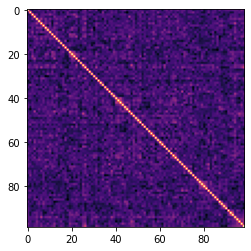

In [17]:
fig = plt.figure()

color_map = plt.imshow(L)
color_map.set_cmap("magma")

plt.show()